In [1]:
import torch
import torch.nn
import json

with open("/home/nlplab/ssd1/jeong/Korean_DCS_2024/baseline/Korean_DCS_2024/resource/data/sample.json","r")as f:
    data = json.load(f)
    
speaker_list = []
utter_list = []
infer_list = []
target_list = []

for i in range(len(data[0]["input"]["conversation"])):
    speaker_list.append(data[0]["input"]["conversation"][i]["speaker"])
    utter_list.append(data[0]["input"]["conversation"][i]["utterance"])
    
for i in range(1,4):
    infer = ''.join(["inference_",str(i)])
    infer_list.append(data[0]["input"][infer])

target_list.append(data[0]["output"])   

print(target_list)

['inference_2']


In [8]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("dudcjs2779/dialogue-summarization-T5")
print(tokenizer.convert_ids_to_tokens(16))

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


/


In [ ]:
torch.

In [2]:
import torch
import torch.nn
import json
from transformers import AutoTokenizer

conversation_list = []
keyword_list = []
target_list = []


with open("/home/nlplab/ssd1/jeong/Korean_DCS_2024/baseline/Korean_DCS_2024/resource/data/sample.json","r")as f:
    dataset = json.load(f)
    print(dataset)
    chat = ["[Conversation]"]
    for cvt in dataset[0]["input"]['conversation']:
        speaker = cvt['speaker']
        utterance = cvt['utterance']
        chat.append(f"{speaker}: {utterance}")
    chat = "\n".join(chat)

    question = f"[Question]\n위 {', '.join(dataset[0]['input']['subject_keyword'])} 주제에 대한 대화를 화자별로 요약해주세요."
    chat = chat + "\n\n" + question

    # con = {}
    # con[data[0]["id"]] = "[BOS]"+"[SEP]".join(utter_list)+"[EOS]"
    # context = " ".join(utter_list)
    # tokenizer = LlamaTokenizer.from_pretrained("llama3")
    # data = tokenizer(context)

    extract_list = []


[{'id': 'nikluge-2024-일상 대화 요약-train-000001', 'input': {'conversation': [{'speaker': 'SD2000001', 'utterance': '저는 여행 다니는 것을 굉장히 좋아하는데요. 그래가지고 스페인이나 뭐 영국 유럽 아니면 국내에서도 뭐 강릉이나 전주 같은 데를 많이 다녔는데'}, {'speaker': 'SD2000001', 'utterance': '혹시 여행 다니는 거 좋아하시나요?'}, {'speaker': 'SD2000002', 'utterance': '저 여행 다니는 거 되게 좋아해서 대학교 내내 여행을 엄청 많이 다녔었는데요.'}, {'speaker': 'SD2000002', 'utterance': '제가 고등학교 때는 여행에 대해 흥미가 없었는데 그게 좀 아버지가 짠대로 패키지처럼 여행을 다녀서 그런 것 같아요.'}, {'speaker': 'SD2000002', 'utterance': '그래서 대학교 간 이후로는 해외여행을 되게 많이 갔었는데 그중에서 제일 기 좋았던 거는 스페인이랑 포르투갈이었거든요.'}, {'speaker': 'SD2000002', 'utterance': '어~ 혹시 포르투갈이나 스페인 유럽 쪽 다녀오신 적 있으신가요?'}, {'speaker': 'SD2000001', 'utterance': '어~ 네. 저도 우연히 스페인과 포르투갈을 다녀왔었었습니다.'}, {'speaker': 'SD2000001', 'utterance': '어~ 저는 스페인 중에서도 마드리드에 근교에 있었던 톨레도라는 지역이 굉장히 좋았는데요. 그 톨레도에서 특히 기억에 남았던 거는 거기에 대성당이 있는데 그 성당이 엄청 화려하더라고요. 그래서 거기를 꾸며논 거를 보면은 금을 엄청 많이 사용해가지고 되게 빤짝빤짝하고 좀 성당은 보통 좀 소박하다라는 인식이 있었는데 아~ 이렇게 화려한 성당도 있구나라는 거를 새롭게 알게 됐었습니다.'}, {'speaker': 'SD2000001', 'utteranc

In [3]:

print(len(conversation_list))
max_key = 0
avg_key = 0
for keyword in keyword_list:
    if max_key < len(keyword):
        max_key = len(keyword)
    avg_key += len(keyword)
avg_key /= len(keyword_list)

print(max_key, avg_key)

max_dial = 0
avg_dial = 0
for conversation in conversation_list:
    if max_dial < len(conversation):
        max_dial = len(conversation)
    avg_dial += len(conversation)
avg_dial /= len(conversation_list)

print(max_dial,avg_dial)

tokenizer = AutoTokenizer.from_pretrained("beomi/Solar-Ko-Recovery-11B")
max_dial = 0
min_dial = 440
avg_dial = 0
for target in target_list:
    target_len = len(tokenizer(target)["input_ids"])
    if max_dial < target_len:
        max_dial = target_len
    avg_dial += target_len
    if min_dial >target_len:
        min_dial = target_len
avg_dial /= len(target_list)

print(max_dial,avg_dial,min_dial)


0


ZeroDivisionError: division by zero

In [5]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("MLP-KTLim/llama-3-Korean-Bllossom-8B")
exsum_list = []
print(tokenizer.convert_tokens_to_ids("너"))
for conversation, keywords in zip(conversation_list, keyword_list):
    keyword_ids = [tokenizer.convert_tokens_to_ids(kw) for kw in keywords]
    extract_list = []
    for sentence_dict in conversation:
        for sentence in sentence_dict.values():
            inputs = tokenizer(sentence)
            input_ids = inputs['input_ids']
            
            if any(kw_id in input_ids for kw_id in keyword_ids):
                extract_list.append(sentence)
    
    exsum_list.append(extract_list)


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


None


In [ ]:
import os
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

model_id = 'MLP-KTLim/llama-3-Korean-Bllossom-8B'

tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    torch_dtype=torch.bfloat16,
    device_map="auto",
)

model.eval()

PROMPT = '''You are a helpful AI assistant. Please answer the user's questions kindly. 당신은 유능한 AI 어시스턴트 입니다. 사용자의 질문에 대해 친절하게 답변해주세요.'''
instruction = "한국에 사는 사람이 해외로 가는 경우를 어떤 여행이라고 해?"

messages = [
    {"role": "system", "content": f"{PROMPT}"},
    {"role": "user", "content": f"{instruction}"}
    ]

input_ids = tokenizer.apply_chat_template(
    messages,
    add_generation_prompt=True,
    return_tensors="pt"
).to(model.device)

terminators = [
    tokenizer.eos_token_id,
    tokenizer.convert_tokens_to_ids("<|eot_id|>")
]

outputs = model.generate(
    input_ids,
    max_new_tokens=2048,
    eos_token_id=terminators,
    do_sample=True,
    temperature=0.6,
    top_p=0.9
)

print(outputs)

In [4]:
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, DataCollatorForLanguageModeling
import torch

class myDataset(Dataset):
    def __init__(self,dataset):
        with open(dataset,"r")as f:
            data = json.load(f)
        self.dataset = data
        
    def __len__(self):
        return len(self.dataset)
    
    def __getitem__(self):
        dataset = self.dataset
        
        speaker_list = []
        utter_list = []
        speak_conv = []
        conversation_dic = {}
        keyword_list = []
        target_list = []
        
        for data in dataset:
            for i in range(len(data["input"]["conversation"])):
                speaker_list.append(data["input"]["conversation"][i]["speaker"])
                utter_list.append(data["input"]["conversation"][i]["utterance"])
                speak_conv.append(str(speaker_list[i])+"[SEP]"+str(utter_list[i]))
            conversation_dic[data["id"]]= "[SPEAK]".join(speak_conv)
            
            keyword_list.append(data["input"]["subject_keyword"])

            target_list.append(data["output"])




0


ZeroDivisionError: division by zero

In [7]:
import json

speaker_list = []
utter_list = []
speak_conv = []
conversation_dic = {}
keyword_list = []
target_list = []

for data in dataset:
    for i in range(len(data["input"]["conversation"])):
        speaker_list.append(data["input"]["conversation"][i]["speaker"])
        utter_list.append(data["input"]["conversation"][i]["utterance"])
        speak_conv.append(str(speaker_list[i])+"[SEP]"+str(utter_list[i]))
    conversation_dic[data["id"]]= "[SPEAK]".join(speak_conv)
    
    keyword_list.append(data["input"]["subject_keyword"])

    target_list.append(data["output"])


print(len(conversation_list))
max_key = 0
avg_key = 0
for keyword in keyword_list:
    if max_key < len(keyword):
        max_key = len(keyword)
    avg_key += len(keyword)
avg_key /= len(keyword_list)

print(max_key, avg_key)

max_dial = 0
avg_dial = 0
# for conversation in conversation_list:
#     if max_dial < len(conversation):
#         max_dial = len(conversation)
#     avg_dial += len(conversation)
# avg_dial /= len(conversation_list)

print(max_dial,avg_dial)

tokenizer = AutoTokenizer.from_pretrained("beomi/Solar-Ko-Recovery-11B")
max_dial = 0
min_dial = 440
avg_dial = 0
for target in target_list:
    target_len = len(tokenizer(target)["input_ids"])
    if max_dial < target_len:
        max_dial = target_len
    avg_dial += target_len
    if min_dial >target_len:
        min_dial = target_len
avg_dial /= len(target_list)

print(max_dial,avg_dial,min_dial)

0
8 1.5909090909090908
0 0


You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama_fast.LlamaTokenizerFast'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565 - if you loaded a llama tokenizer from a GGUF file you can ignore this message.


440 198.38735177865613 82


In [5]:
import json
with open("/home/nlplab/ssd1/jeong/Korean_DCS_2024/baseline/Korean_DCS_2024/resource/data/일상대화요약_train.json","r")as f:
    dataset = json.load(f)

    speaker_list = []
    utter_list = []
    keyword_list = []
    target_list = []

    for data in dataset:
        for i in range(len(data["input"]["conversation"])):
            speaker_list.append(data["input"]["conversation"][i]["speaker"])
            utter_list.append(data["input"]["conversation"][i]["utterance"])
        keyword_list.append(data["input"]["subject_keyword"])
        target_list.append(data["output"])
print(len(keyword_list))

506


In [1]:
if False == True:
    import torch
else:
    None
torch.Tensor()

NameError: name 'torch' is not defined

In [49]:
import textwrap

# 설정할 최대 길이
max_length = 50

print("=" * 200)
for i in range(len(speaker_list)):
    # 각 발화 내용을 max_length 길이로 줄바꿈
    wrapped_text = textwrap.fill(f"{speaker_list[i]} : {utter_list[i]}", width=max_length)
    print(wrapped_text)
print("=" * 200)
print("Summary")
# 요약 내용을 max_length 길이로 줄바꿈
wrapped_summary = textwrap.fill(f"{target_list[0]}", width=max_length)
print(wrapped_summary)
print("=" * 200)
print("keyword")
print(keyword_list[0][0])


SD2000001 : 저는 여행 다니는 것을 굉장히 좋아하는데요. 그래가지고 스페인이나 뭐
영국 유럽 아니면 국내에서도 뭐 강릉이나 전주 같은 데를 많이 다녔는데
SD2000001 : 혹시 여행 다니는 거 좋아하시나요?
SD2000002 : 저 여행 다니는 거 되게 좋아해서 대학교 내내 여행을 엄청 많이
다녔었는데요.
SD2000002 : 제가 고등학교 때는 여행에 대해 흥미가 없었는데 그게 좀 아버지가
짠대로 패키지처럼 여행을 다녀서 그런 것 같아요.
SD2000002 : 그래서 대학교 간 이후로는 해외여행을 되게 많이 갔었는데 그중에서
제일 기 좋았던 거는 스페인이랑 포르투갈이었거든요.
SD2000002 : 어~ 혹시 포르투갈이나 스페인 유럽 쪽 다녀오신 적 있으신가요?
SD2000001 : 어~ 네. 저도 우연히 스페인과 포르투갈을 다녀왔었었습니다.
SD2000001 : 어~ 저는 스페인 중에서도 마드리드에 근교에 있었던 톨레도라는 지역이
굉장히 좋았는데요. 그 톨레도에서 특히 기억에 남았던 거는 거기에 대성당이 있는데 그
성당이 엄청 화려하더라고요. 그래서 거기를 꾸며논 거를 보면은 금을 엄청 많이 사용해가지고
되게 빤짝빤짝하고 좀 성당은 보통 좀 소박하다라는 인식이 있었는데 아~ 이렇게 화려한
성당도 있구나라는 거를 새롭게 알게 됐었습니다.
SD2000001 : 어~ 또 톨레도에 지역 음식도 같이 먹었었는데 아~ 이름은 지금 잘
생각이 나지는 않지만 굉장히 달달했던 그런 디저트 종류였는데 그~ 디저트도 먹고 그다음에
천천히 걸어 다니면서 주변 풍경도 보고 근교 여행만의 약간 소박한 맛이 있었다고 생각을
합니다.
SD2000001 : 어~ 또 물론 마드리드도 굉장히 좋았는데 유럽 여행을 많이 가셨다고
해서 혹시 톨레도도 가본 적이 있나요?
SD2000002 : 아~ 제가 톨레도도 다녀왔는데 저는 이제 여행 일정을 길게 잡아서
톨레도는 하루를 봤는데 도 그렇게 너무 더웠기 때문에 많이 보진 못한 것 같아요.
SD2000002 : 그때는 버스 관광버스를 타

In [51]:
import pandas as pd
import textwrap

csv_file_path = "/home/nlplab/ssd1/jeong/Korean_DCS_2024/baseline/Korean_DCS_2024/resource/data/train.csv"

df = pd.read_csv(csv_file_path)
conversation = df.iloc[0,1]
summary = df.iloc[0,2]
keyword = df.iloc[0,3]
print(conversation)
print(summary)
print(keyword)



#Person1#: Hi, Mr. Smith. I'm Doctor Hawkins. Why are you here today?
#Person2#: I found it would be a good idea to get a check-up.
#Person1#: Yes, well, you haven't had one for 5 years. You should have one every year.
#Person2#: I know. I figure as long as there is nothing wrong, why go see the doctor?
#Person1#: Well, the best way to avoid serious illnesses is to find out about them early. So try to come at least once a year for your own good.
#Person2#: Ok.
#Person1#: Let me see here. Your eyes and ears look fine. Take a deep breath, please. Do you smoke, Mr. Smith?
#Person2#: Yes.
#Person1#: Smoking is the leading cause of lung cancer and heart disease, you know. You really should quit.
#Person2#: I've tried hundreds of times, but I just can't seem to kick the habit.
#Person1#: Well, we have classes and some medications that might help. I'll give you more information before you leave.
#Person2#: Ok, thanks doctor.
Mr. Smith's getting a check-up, and Doctor Hawkins advises him to ha

In [53]:
import pandas as pd
import textwrap

# 설정할 최대 길이
max_length = 100

# CSV 파일 경로
csv_file_path = "/home/nlplab/ssd1/jeong/Korean_DCS_2024/baseline/Korean_DCS_2024/resource/data/train.csv"

# CSV 파일 읽기
df = pd.read_csv(csv_file_path)

# 첫 번째 행의 데이터 추출
conversation = df.iloc[0, 1]  # conversation 열
summary = df.iloc[0, 2]       # summary 열
keyword = df.iloc[0, 3]       # keyword 열

# 출력
print("Conversation:")
wrapped_conversation = textwrap.fill(conversation, width=max_length)
print(conversation)

print("\nSummary:")
wrapped_summary = textwrap.fill(summary, width=max_length)
print(wrapped_summary)

print("\nKeyword:")
wrapped_keyword = textwrap.fill(keyword, width=max_length)
print(wrapped_keyword)

Conversation:
#Person1#: Hi, Mr. Smith. I'm Doctor Hawkins. Why are you here today?
#Person2#: I found it would be a good idea to get a check-up.
#Person1#: Yes, well, you haven't had one for 5 years. You should have one every year.
#Person2#: I know. I figure as long as there is nothing wrong, why go see the doctor?
#Person1#: Well, the best way to avoid serious illnesses is to find out about them early. So try to come at least once a year for your own good.
#Person2#: Ok.
#Person1#: Let me see here. Your eyes and ears look fine. Take a deep breath, please. Do you smoke, Mr. Smith?
#Person2#: Yes.
#Person1#: Smoking is the leading cause of lung cancer and heart disease, you know. You really should quit.
#Person2#: I've tried hundreds of times, but I just can't seem to kick the habit.
#Person1#: Well, we have classes and some medications that might help. I'll give you more information before you leave.
#Person2#: Ok, thanks doctor.

Summary:
Mr. Smith's getting a check-up, and Doctor H

In [ ]:
DialogSum: A Real-Life Scenario Dialogue Summarization Dataset

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


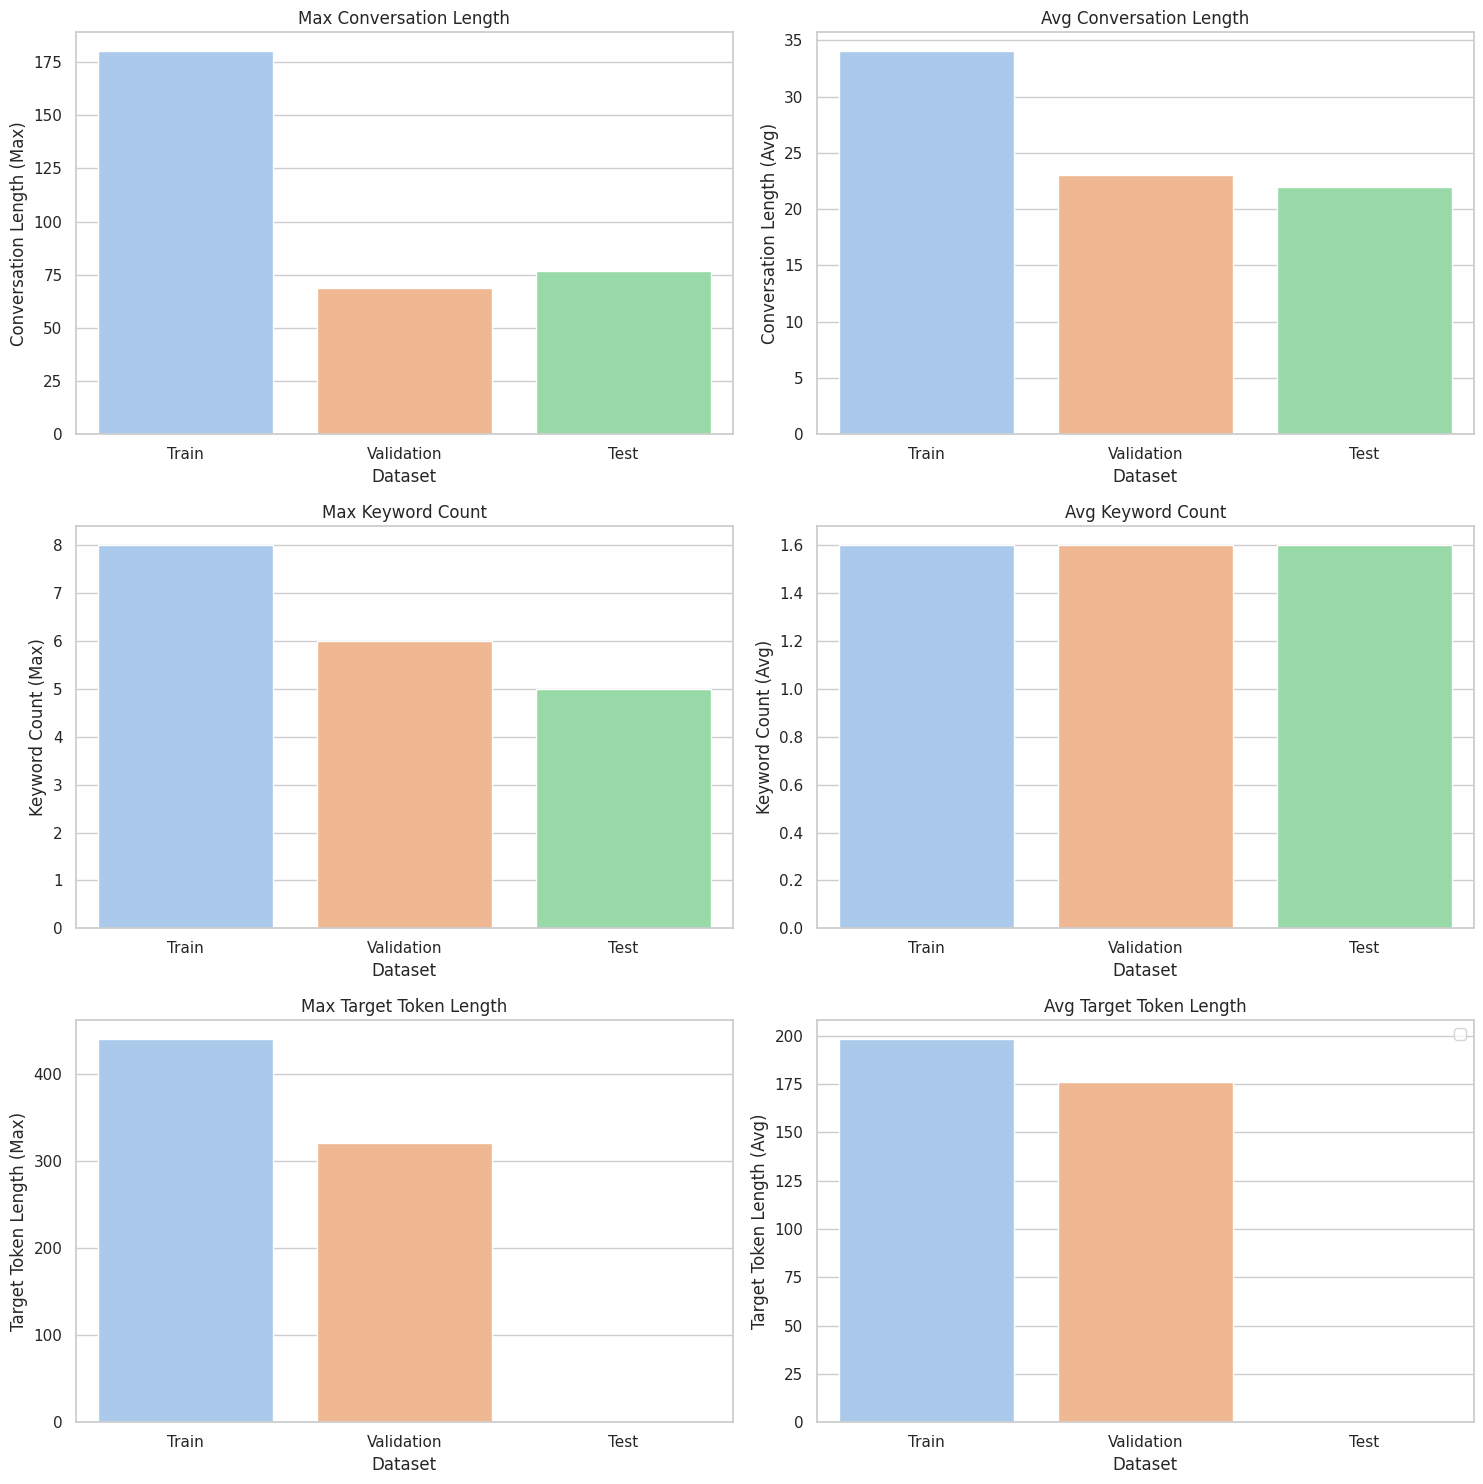

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 데이터 요약
data_summary = {
    'Dataset': ['Train', 'Validation', 'Test'],
    'Conversation Length (Max)': [180, 69, 77],
    'Conversation Length (Avg)': [34, 23, 22],
    'Keyword Count (Max)': [8, 6, 5],
    'Keyword Count (Avg)': [1.6, 1.6, 1.6],
    'Target Token Length (Max)': [440, 321, 0],
    'Target Token Length (Avg)': [198, 176, 0]
}

# 데이터프레임 생성
df = pd.DataFrame(data_summary)

# 스타일 설정
sns.set(style="whitegrid", palette="pastel")

# 서브플롯 생성
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Max Conversation Length
sns.barplot(x='Dataset', y='Conversation Length (Max)', data=df, ax=axes[0, 0], hue='Dataset', dodge=False)
axes[0, 0].set_title('Max Conversation Length')

# Avg Conversation Length
sns.barplot(x='Dataset', y='Conversation Length (Avg)', data=df, ax=axes[0, 1], hue='Dataset', dodge=False)
axes[0, 1].set_title('Avg Conversation Length')

# Max Keyword Count
sns.barplot(x='Dataset', y='Keyword Count (Max)', data=df, ax=axes[1, 0], hue='Dataset', dodge=False)
axes[1, 0].set_title('Max Keyword Count')

# Avg Keyword Count
sns.barplot(x='Dataset', y='Keyword Count (Avg)', data=df, ax=axes[1, 1], hue='Dataset', dodge=False)
axes[1, 1].set_title('Avg Keyword Count')

# Max Target Token Length
sns.barplot(x='Dataset', y='Target Token Length (Max)', data=df, ax=axes[2, 0], hue='Dataset', dodge=False)
axes[2, 0].set_title('Max Target Token Length')

# Avg Target Token Length
sns.barplot(x='Dataset', y='Target Token Length (Avg)', data=df, ax=axes[2, 1], hue='Dataset', dodge=False)
axes[2, 1].set_title('Avg Target Token Length')

# 범례를 하나의 서브플롯에만 표시하고 나머지에서는 제거
handles, labels = axes[0, 0].get_legend_handles_labels()
axes[0, 0].legend().remove()
axes[0, 1].legend().remove()
axes[1, 0].legend().remove()
axes[1, 1].legend().remove()
axes[2, 0].legend().remove()
axes[2, 1].legend(handles=handles, labels=labels, loc='upper right')

# 레이아웃 조정
plt.tight_layout()
plt.show()



In [1]:
from transformers import AutoTokenizer, AutoModelForCausalLM
from huggingface_hub import login

model_id = "CohereForAI/aya-23-8B"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(model_id)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

In [7]:
model.padding_side

AttributeError: 'LlamaForCausalLM' object has no attribute 'padding_side'

In [5]:
model_id = "MLP-KTLim/llama-3-Korean-Bllossom-8B"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(model_id)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

In [2]:
# Format message with the command-r-plus chat template
messages = [{"role": "user", "content": "Anneme onu ne kadar sevdiğimi anlatan bir mektup yaz"}]
input_ids = tokenizer.apply_chat_template(messages, tokenize=True, add_generation_prompt=True, return_tensors="pt")
## <BOS_TOKEN><|START_OF_TURN_TOKEN|><|USER_TOKEN|>Anneme onu ne kadar sevdiğimi anlatan bir mektup yaz<|END_OF_TURN_TOKEN|><|START_OF_TURN_TOKEN|><|CHATBOT_TOKEN|>

gen_tokens = model(
    input_ids, 
    # max_new_tokens=150, 
    # do_sample=True, 
    # temperature=0.3,
    )

print(gen_tokens)
print(tokenizer.tokens_to_ids("<pad>"))

CausalLMOutputWithPast(loss=None, logits=tensor([[[ 3.0054,  8.0182,  5.4140,  ..., -6.1488, -6.1490, -6.1489],
         [ 3.5422,  4.8794,  1.8080,  ..., -6.4061, -6.4060, -6.4060],
         [ 3.2181,  6.3941,  5.4171,  ..., -4.8307, -4.8307, -4.8306],
         ...,
         [ 4.7385,  6.0809,  2.8943,  ..., -7.3704, -7.3704, -7.3703],
         [ 4.4753,  4.4021,  1.8769,  ..., -5.1543, -5.1542, -5.1540],
         [ 6.6275,  8.7654,  6.8751,  ..., -4.1984, -4.1983, -4.1983]]],
       grad_fn=<UnsafeViewBackward0>), past_key_values=((tensor([[[[ 2.3991e+00,  1.2709e+00,  1.5283e+00,  ...,  1.3384e+00,
           -4.9506e-01, -2.7462e-01],
          [-3.5848e-21,  6.9384e-22, -2.2659e-21,  ...,  1.7033e-21,
           -1.3529e-21,  1.7518e-21],
          [-5.9251e+00, -2.3939e+00, -7.6358e-01,  ..., -8.4325e-02,
           -8.2076e-01, -8.2610e-01],
          ...,
          [-6.9334e+00,  2.2569e+00, -1.8912e+00,  ...,  7.0249e-01,
           -9.1352e-01, -1.3121e+00],
          [ 2.102

AttributeError: 'PreTrainedTokenizerFast' object has no attribute 'tokens_to_ids'

In [1]:
import argparse
import json
import os
from tqdm import tqdm
import torch
import torch.nn as nn
from torch.optim import AdamW
from transformers import (AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig, 
                          Trainer, TrainingArguments, get_cosine_schedule_with_warmup, 
                          get_linear_schedule_with_warmup)
from trl import SFTTrainer, SFTConfig
from peft import prepare_model_for_kbit_training, LoraConfig, get_peft_model, TaskType
from src.data import CustomDataset, DataCollatorForSupervisedDataset
from src.utils import set_random_seed
from src.arg_parser import get_args
from accelerate import Accelerator
import wandb
import bitsandbytes as bnb
from rouge_score import rouge_scorer
from transformers import TrainerCallback, TrainerState, TrainerControl
import logging
from datetime import datetime, timezone, timedelta

from datasets import Dataset

model = AutoModelForCausalLM.from_pretrained("beomi/Llama-3-Open-Ko-8B")
tokenizer = AutoTokenizer.from_pretrained("beomi/Llama-3-Open-Ko-8B")
tokenizer.padding_side = "left"
tokenizer.pad_token = tokenizer.eos_token

print(tokenizer.padding_side)

train_dataset = CustomDataset("resource/data/일상대화요약_train.json", tokenizer)
valid_dataset = CustomDataset("resource/data/일상대화요약_dev.json", tokenizer)

optimizer = bnb.optim.AdamW8bit(model.parameters(), lr=1e-5, weight_decay=0.001)


train_dataloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=1, shuffle=True
    # collate_fn=DataCollatorForSupervisedDataset(tokenizer)
)

valid_dataloader = torch.utils.data.DataLoader(
    valid_dataset, batch_size=1, shuffle=False,
    collate_fn=DataCollatorForSupervisedDataset(tokenizer)
)

total_steps = len(train_dataloader) * 10 // 10

step = 0
best_eval_loss = float('inf')
saved_models = []
r_score = 0
scorer = rouge_scorer.RougeScorer(['rouge1'])
for ep in range(10):
    print(f"Epoch {ep + 1} 시작")
    for i, batch in enumerate(train_dataloader):
        print(batch)
        inputs = batch["input_ids"]
        labels = batch["labels"] 
        outputs = model(inputs)
        for idx, output in enumerate(outputs["logits"]):
                    scores = scorer.score(labels[idx], output)
                    for i in scores[key]:
                        r_score += score
                        print(r_score/3)
    #     loss = loss_fn(labels, outputs, tokenizer) / args.gradient_accumulation_steps
    #     accelerator.backward(loss)
    #     step += 1
        
    #     if step % args.gradient_accumulation_steps == 0:
    #         print(f"Loss: {loss.item()}, Step: {step}")
    #         wandb.log({"loss": loss.item(), "step": step})
    #         optimizer.step()
    #         scheduler.step()
    #         optimizer.zero_grad()
    
    # epoch_save_dir = os.path.join(args.save_dir, f"{args.model_id}/{ep+1}")

Loading checkpoint shards:   0%|          | 0/6 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


left
Epoch 1 시작
{'input_ids': tensor([[128000, 128006,   9125,  ..., 116304,     13, 128001]]), 'labels': tensor([[  -100,   -100,   -100,  ..., 116304,     13, 128001]])}


AttributeError: 'Tensor' object has no attribute 'lower'

: 

In [15]:
len(outputs["logits"])

1

In [23]:
from torch.nn.utils.rnn import pad_sequence
a = torch.ones(25, 300)
b = torch.ones(22, 300)
c = torch.ones(15, 300)
print(pad_sequence([a, b, c]))

tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        ...,

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])


In [9]:
from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(['rouge1'])
candidate_summary = ["the cat was found under the bed","the cat was found under the bed"]
reference_summary = ["the cat was under the bed","the cat was under the bed"]
scores = scorer.score(reference_summary, candidate_summary)
# for key in scores:
#     print(key)
#     print(f'{key}: {scores[key]}')
sum = 0
for i in scores[key]:
    sum += i
sum /= 3
print(sum)

AttributeError: 'list' object has no attribute 'lower'